Подключение библиотек

In [275]:
import re
import numpy as np
import pandas as pd

# Получаем имя загруженного файла
input_filename = "emed_careers_eu.csv"
print(f"Загружен файл: {input_filename}")

# Создаем DataFrame из загруженного файла
df = pd.read_csv(input_filename)
print(f"Размер исходного датасета: {df.shape}")
print(f"Колонки: {list(df.columns)}")

Загружен файл: emed_careers_eu.csv
Размер исходного датасета: (39774, 8)
Колонки: ['category', 'company_name', 'job_description', 'job_title', 'job_type', 'location', 'post_date', 'salary_offered']


In [276]:
df.head()

,category,company_name,job_description,job_title,job_type,location,post_date,salary_offered
0,Clinical Research,PPD GLOBAL LTD,"As part of our on-going growth, we are current...",Senior / Medical Writer (Regulatory),Permanent,Cambridge,4/14/2018,Competitive
1,Science,AL Solutions,Manager of Biometrics – Italy\nAL Solutions ar...,Manager of Biometrics,Permanent,Europe,4/16/2018,NaN
2,Science,Seltek Consultants Ltd,A fantastic opportunity has arisen for an expe...,Field Service Engineer | Chromatography,Permanent,UK,4/16/2018,NaN
3,Data Management and Statistics,Docs International UK Limited,Job Details\n:\nUtilise extensive clinical dat...,Data Manager of Project Management,Permanent,M4 Corridor,4/11/2018,On Application
4,Science,Hyper Recruitment Solutions Ltd,Hyper Recruitment Solutions are currently look...,Strategic Market Analyst,Permanent,Cambridge,4/13/2018,NaN


In [277]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         30000 non-null  object
 1   company_name     30000 non-null  object
 2   job_description  30000 non-null  object
 3   job_title        30000 non-null  object
 4   job_type         30000 non-null  object
 5   location         30000 non-null  object
 6   post_date        30000 non-null  object
 7   salary_offered   22685 non-null  object
dtypes: object(8)
memory usage: 2.4+ MB


Index(['category', 'company_name', 'job_description', 'job_title', 'job_type',
       'location', 'post_date', 'salary_offered'],
      dtype='object')

In [278]:
print(f"Пропуски по стобцам:\n" + str(df.isnull().sum()))
print("Количество дубликатов:" + str(df.duplicated().sum()))

Пропуски по стобцам:
category            9774
company_name        9774
job_description     9774
job_title           9774
job_type            9774
location            9774
post_date           9774
salary_offered     17089
dtype: int64
Количество дубликатов:23022


In [279]:
# Уникальные значения по столбцам для анализа категориальных признаков
df.nunique()

category             18
company_name        166
job_description    3974
job_title          2037
job_type              6
location             26
post_date            15
salary_offered      894
dtype: int64

In [280]:
X = 90  # порог в процентах

# Считаем долю пропусков в каждой строке
missing_per_row = df.isnull().sum(axis=1) / len(df.columns) * 100

# Считаем, сколько строк превышают порог X%
rows_with_many_missing = (missing_per_row > X).sum()

# Доля таких строк от общего количества
result = (rows_with_many_missing / len(df)) * 100

print(f"Доля строк с пропусками > {X}%: {result:.2f}%")
print(f"Всего строк: {len(df)}")
print(f"Строк с пропусками > {X}%: {rows_with_many_missing}")

Доля строк с пропусками > 90%: 24.57%
Всего строк: 39774
Строк с пропусками > 90%: 9774


Удаление дубликатов

In [281]:
# Удаляем все дубликаты строк
df = df.drop_duplicates()
print(f"Размер после удаления дубликатов: {df.shape}")

# Очищаем строковые колонки от пробелов в начале и конце
for c in df.columns:
    if df[c].dtype == "object":
        df[c] = df[c].astype("string").str.strip()

print("Строковые поля очищены от пробелов")

Размер после удаления дубликатов: (16752, 8)
Строковые поля очищены от пробелов


In [282]:
print(f"Пропуски по стобцам:\n" + str(df.isnull().sum()))
print("Количество дубликатов:" + str(df.duplicated().sum()))

Пропуски по стобцам:
category              1
company_name          1
job_description       1
job_title             1
job_type              1
location              1
post_date             1
salary_offered     4235
dtype: int64
Количество дубликатов:0


Нормализация названий компаний и локаций

In [283]:
# Нормализует текстовое значение:
#   Заменяет пропущенные значения на "UNKNOWN"
#   Удаляет лишние пробелы
#   Удаляет все символы кроме букв, цифр и пробелов
#   Приводит к верхнему регистру
def normalize_token(val) -> str:
    if pd.isna(val):
        return "UNKNOWN"
    s = str(val).strip()
    if s == "" or s.lower() in {"nan", "none"}:
        return "UNKNOWN"
    s = re.sub(r"\s+", " ", s)
    s = re.sub(r"[^A-Za-z0-9 ]+", "", s)
    s = s.strip().upper()
    return s if s else "UNKNOWN"

# Применяем нормализацию к company_name
if "company_name" in df.columns:
    df["company_name"] = df["company_name"].apply(normalize_token)
    print("Названия компаний нормализованы")

# Применяем нормализацию к location
if "location" in df.columns:
    df["location"] = df["location"].apply(normalize_token)
    # Специальные замены для локаций
    df["location"] = df["location"].replace({"UK2": "UK", "U K": "UK"})
    print("Локации нормализованы")

Названия компаний нормализованы
Локации нормализованы


Обработка дат публикации

In [284]:
if "post_date" in df.columns:
    # Преобразуем строки в datetime
    df["post_date"] = pd.to_datetime(df["post_date"], errors="coerce")

    # Извлекаем компоненты даты
    df["post_year"] = df["post_date"].dt.year
    df["post_month"] = df["post_date"].dt.month
    df["post_day"] = df["post_date"].dt.day
    df["post_dayofweek"] = df["post_date"].dt.dayofweek

    print("Компоненты даты извлечены")
    print(f"Диапазон дат: с {df['post_date'].min()} по {df['post_date'].max()}")
else:
    print("Колонка 'post_date' не найдена")

Компоненты даты извлечены
Диапазон дат: с 2018-04-03 00:00:00 по 2018-04-17 00:00:00


Анализ описаний вакансий

In [285]:
if "job_description" in df.columns:
    s = df["job_description"].fillna("").astype("string")

    # Базовые метрики описания
    df["desc_len"] = s.str.len()
    df["desc_word_count"] = s.str.split().str.len()

    print(f"Средняя длина описания: {df['desc_len'].mean():.0f} символов")
    print(f"Среднее количество слов: {df['desc_word_count'].mean():.0f}")

    # Паттерны для поиска ключевых слов
    patterns = {
        "kw_remote": r"\bremote\b|\bwork from home\b|\bwfh\b|\bhybrid\b",
        "kw_bonus": r"\bbonus\b|\bcommission\b|\bperformance\b",
        "kw_senior": r"\bsenior\b|\blead\b|\bstaff\b|\bprincipal\b",
        "kw_junior": r"\bjunior\b|\bentry\b|\bgraduate\b|\bintern\b",
        "kw_manager": r"\bmanager\b|\bhead of\b|\bdirector\b",
        "kw_english": r"\benglish\b",
        "kw_german": r"\bgerman\b|\bdeutsch\b",
        "kw_french": r"\bfrench\b|\bfran[cç]ais\b",
        "kw_visa": r"\bvisa\b|\brelocation\b|\bsponsorship\b",
        "kw_python": r"\bpython\b",
        "kw_sql": r"\bsql\b",
        "kw_ml": r"\bmachine learning\b|\bdeep learning\b|\bartificial intelligence\b|\b ai\b",
        "kw_phd": r"\bphd\b|\bdoctorate\b",
    }

    # Создаем бинарные признаки для каждого паттерна
    for feat, pat in patterns.items():
        df[feat] = s.str.contains(pat, case=False, regex=True, na=False).astype(int)

    print(f"Создано {len(patterns)} признаков на основе ключевых слов")

    # Выводим статистику по найденным ключевым словам
    kw_cols = [col for col in df.columns if col.startswith('kw_')]
    kw_stats = df[kw_cols].mean().sort_values(ascending=False)
    print("\nЧастота встречаемости ключевых слов:")
    for kw, freq in kw_stats.items():
        print(f"  {kw}: {freq:.1%}")
else:
    print("Колонка 'job_description' не найдена")

Средняя длина описания: 2420 символов
Среднее количество слов: 358
Создано 13 признаков на основе ключевых слов

Частота встречаемости ключевых слов:
  kw_senior: 58.1%
  kw_manager: 47.7%
  kw_bonus: 28.2%
  kw_junior: 15.8%
  kw_english: 15.8%
  kw_phd: 8.7%
  kw_remote: 5.3%
  kw_german: 5.3%
  kw_visa: 3.5%
  kw_french: 2.1%
  kw_sql: 0.9%
  kw_ml: 0.7%
  kw_python: 0.4%


Анализ названий должностей

In [286]:
if "job_title" in df.columns:
    t = df["job_title"].fillna("").astype("string")

    # Базовые метрики названия
    df["title_len"] = t.str.len()
    df["title_word_count"] = t.str.split().str.len()

    print(f"Средняя длина названия: {df['title_len'].mean():.0f} символов")
    print(f"Среднее количество слов: {df['title_word_count'].mean():.0f}")

    # Определяем уровень должности по названию
    df["title_has_senior"] = t.str.contains(r"\bsenior\b|\blead\b|\bprincipal\b|\bstaff\b", case=False, regex=True, na=False).astype(int)
    df["title_has_junior"] = t.str.contains(r"\bjunior\b|\bintern\b|\bgraduate\b|\bentry\b", case=False, regex=True, na=False).astype(int)
    df["title_has_manager"] = t.str.contains(r"\bmanager\b|\bdirector\b|\bhead\b", case=False, regex=True, na=False).astype(int)

    print(f"Должности с признаком senior: {df['title_has_senior'].sum()} ({df['title_has_senior'].mean():.1%})")
    print(f"Должности с признаком junior: {df['title_has_junior'].sum()} ({df['title_has_junior'].mean():.1%})")
    print(f"Должности с признаком manager: {df['title_has_manager'].sum()} ({df['title_has_manager'].mean():.1%})")
else:
    print("Колонка 'job_title' не найдена")

Средняя длина названия: 26 символов
Среднее количество слов: 3
Должности с признаком senior: 3410 (20.4%)
Должности с признаком junior: 272 (1.6%)
Должности с признаком manager: 6154 (36.7%)


Извлечение зарплатных данных

In [287]:
# Извлекает информацию о зарплате из текстового описания:
#     - Находит числовые значения
#     - Определяет минимальную и максимальную зарплату
#     - Определяет, указана ли зарплата как "конкурентная"
def extract_salary_range(text):
    if pd.isna(text):
        return (np.nan, np.nan, 0, 0)
    s = str(text).lower().strip()

    # Проверяем на наличие слов, указывающих на отсутствие конкретной суммы
    competitive_words = ["competitive", "not disclosed", "negotiable", "depending", "doe", "tbd"]
    is_competitive = int(any(w in s for w in competitive_words))

    # Обрабатываем сокращения с "k" (например, "50k" -> 50000)
    s = re.sub(r"(\d+)\s*k\b", lambda m: str(int(m.group(1)) * 1000), s)
    s = re.sub(r"(\d)\s+(\d)", r"\1\2", s)

    # Извлекаем все числа
    nums = re.findall(r"\d[\d,]*", s)
    nums = [n.replace(",", "") for n in nums if n.replace(",", "").isdigit()]
    nums = [int(n) for n in nums]

    if len(nums) >= 2:
        return (nums[0], nums[1], is_competitive, 1)
    if len(nums) == 1:
        return (nums[0], np.nan, is_competitive, 1)
    return (np.nan, np.nan, is_competitive, 0)

if "salary_offered" in df.columns:
    # Создаем признаки на основе зарплатных данных
    df["salary_provided"] = df["salary_offered"].notna().astype(int)
    ext = df["salary_offered"].apply(extract_salary_range)
    df["salary_min"] = ext.apply(lambda x: x[0])
    df["salary_max"] = ext.apply(lambda x: x[1])
    df["salary_is_competitive"] = ext.apply(lambda x: x[2])
    df["salary_numeric_found"] = ext.apply(lambda x: x[3])
    df["salary_avg"] = df[["salary_min", "salary_max"]].mean(axis=1)

    print(f"Зарплата указана в {df['salary_provided'].sum()} вакансиях ({df['salary_provided'].mean():.1%})")
    print(f"Числовые значения найдены в {df['salary_numeric_found'].sum()} вакансиях")
    print(f"Средняя минимальная зарплата: {df['salary_min'].mean():.0f}")
    print(f"Средняя максимальная зарплата: {df['salary_max'].mean():.0f}")
    print(f"Формулировка 'competitive' встречается в {df['salary_is_competitive'].mean():.1%} случаев")
else:
    print("Колонка 'salary_offered' не найдена")

Зарплата указана в 12517 вакансиях (74.7%)
Числовые значения найдены в 2988 вакансиях
Средняя минимальная зарплата: 41055
Средняя максимальная зарплата: 49941
Формулировка 'competitive' встречается в 35.6% случаев


Кодирование категориальных признаков

In [288]:
# Оставляет только n самых частых значений, остальные заменяет на "OTHER"
def top_n_other(series, n=80):
    series = series.fillna("UNKNOWN").astype("string")
    top = series.value_counts().nlargest(n).index
    return series.where(series.isin(top), other="OTHER")

TOP_N_COMPANIES = 80
TOP_N_LOCATIONS = 80

cat_cols = []

# Добавляем стандартные категориальные колонки
for col in ["category", "job_type"]:
    if col in df.columns:
        cat_cols.append(col)
        print(f"Добавлена категориальная колонка: {col}")

# Обрабатываем company_name (оставляем топ-80)
if "company_name" in df.columns:
    df["company_name"] = top_n_other(df["company_name"], n=TOP_N_COMPANIES)
    cat_cols.append("company_name")
    unique_companies = df["company_name"].nunique()
    print(f"Компании: оставлено {unique_companies} уникальных значений (включая OTHER)")

# Обрабатываем location (оставляем топ-80)
if "location" in df.columns:
    df["location"] = top_n_other(df["location"], n=TOP_N_LOCATIONS)
    cat_cols.append("location")
    unique_locations = df["location"].nunique()
    print(f"Локации: оставлено {unique_locations} уникальных значений (включая OTHER)")

# Создаем dummy-переменные (one-hot encoding)
df_processed = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(f"\nРазмер после one-hot encoding: {df_processed.shape}")
print(f"Количество признаков увеличилось с {df.shape[1]} до {df_processed.shape[1]}")

Добавлена категориальная колонка: category
Добавлена категориальная колонка: job_type
Компании: оставлено 81 уникальных значений (включая OTHER)
Локации: оставлено 20 уникальных значений (включая OTHER)

Размер после one-hot encoding: (16752, 155)
Количество признаков увеличилось с 38 до 155


Удаление исходных текстовых колонок

In [289]:
columns_to_drop = [c for c in ["post_date", "job_description", "job_title", "salary_offered"]
                   if c in df_processed.columns]

df_processed = df_processed.drop(columns=columns_to_drop, errors="ignore")
print(f"Удалены колонки: {columns_to_drop}")
print(f"Размер после удаления: {df_processed.shape}")

Удалены колонки: ['post_date', 'job_description', 'job_title', 'salary_offered']
Размер после удаления: (16752, 151)


Преобразование типов и обработка пропусков

In [290]:
# Преобразуем boolean в int (0/1)
bool_cols = df_processed.select_dtypes(include=["bool"]).columns
df_processed[bool_cols] = df_processed[bool_cols].astype(int)
if len(bool_cols) > 0:
    print(f"Преобразовано {len(bool_cols)} булевых колонок в целые числа")

Преобразовано 121 булевых колонок в целые числа


In [291]:
df_processed["salary_avg"].describe()

count      2988.000000
mean      45062.405957
std       37622.878890
min           0.000000
25%       23500.000000
50%       40000.000000
75%       60000.000000
max      410000.000000
Name: salary_avg, dtype: float64

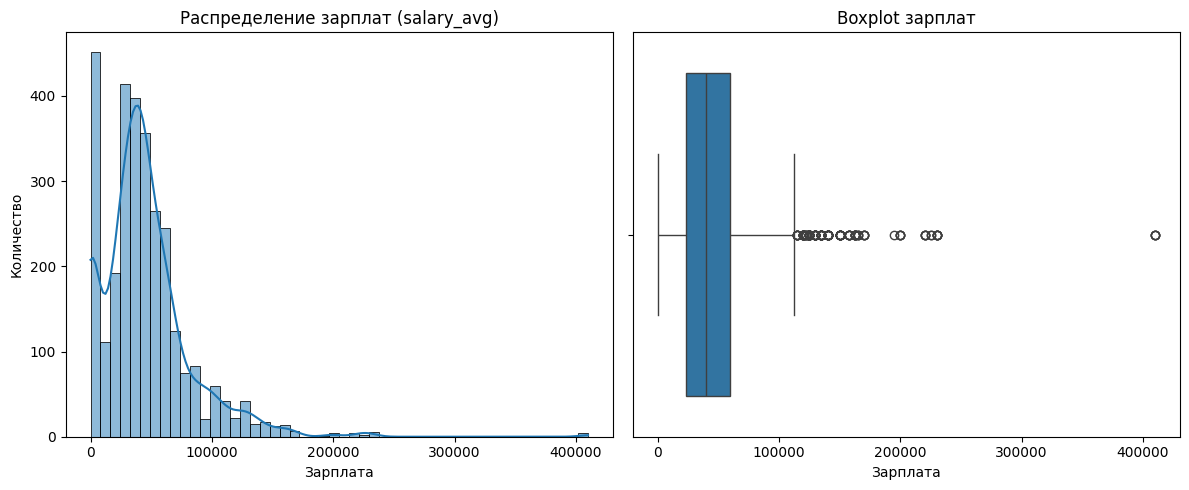

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка графиков
plt.figure(figsize=(12,5))

# 1️⃣ Гистограмма зарплат
plt.subplot(1, 2, 1)
sns.histplot(df_processed["salary_avg"], bins=50, kde=True)
plt.title("Распределение зарплат (salary_avg)")
plt.xlabel("Зарплата")
plt.ylabel("Количество")

# 2️⃣ Boxplot (коробчатая диаграмма)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_processed["salary_avg"])
plt.title("Boxplot зарплат")
plt.xlabel("Зарплата")

plt.tight_layout()
plt.show()

In [293]:
# Заполняем пропуски в числовых колонках медианными значениями
#num_cols = df_processed.select_dtypes(include=[np.number]).columns
#df_processed[num_cols] = df_processed[num_cols].fillna(df_processed[num_cols].median(numeric_only=True))
#print(f"Заполнены пропуски в {len(num_cols)} числовых колонках")

Для каждой колонки с пропусками заполняем медианной по группе, там где в колонке salary_is_competitive стоит флаг 1, где нет флага удаляем строку с пропущенными значениями чтобы не искажать данные. Медианна заполняется по группам junior/senior/manager.

In [294]:
df_processed = df_processed[(df_processed["salary_avg"] <= 400000) & (df_processed["salary_avg"] >= 1000) | (df_processed["salary_avg"].isna())]

In [295]:
import pandas as pd

# Список бинарных колонок
groups = ["kw_manager", "kw_junior", "kw_senior"]

mask_comp = df_processed["salary_is_competitive"] == 1

# Статистика
filled_stats = {}
filled_total = 0

# Создаем колонку с "комбинацией группы" как tuple
df_processed["group_combo"] = df_processed[groups].apply(tuple, axis=1)

# Получаем уникальные комбинации
unique_combos = df_processed.loc[mask_comp, "group_combo"].unique()

for combo in unique_combos:
    combo_mask = mask_comp & (df_processed["group_combo"] == combo)
    
    # Если комбинация (0,0,0) → медиана по всей выборке
    if combo == (0,0,0):
        median_val = df_processed.loc[mask_comp, "salary_avg"].median()
        filled_stats["no_group"] = df_processed.loc[combo_mask, "salary_avg"].isna().sum()
    else:
        median_val = df_processed.loc[combo_mask, "salary_avg"].median()
        filled_stats[combo] = df_processed.loc[combo_mask, "salary_avg"].isna().sum()
    
    # Заполняем NaN
    df_processed.loc[combo_mask, "salary_avg"] = df_processed.loc[combo_mask, "salary_avg"].fillna(median_val)
    filled_total += df_processed.loc[combo_mask, "salary_avg"].isna().sum()

# Удаляем оставшиеся NaN
total_nan_before_drop = df_processed["salary_avg"].isna().sum()
df_processed = df_processed.dropna(subset=["salary_avg"])
total_deleted = total_nan_before_drop

# Вывод статистики
print("Статистика заполнения медианой:")
for key, count in filled_stats.items():
    print(f"  {key}: подставлено {count} значений")

print(f"\nУдалено строк с NaN после заполнения: {total_deleted}")

Статистика заполнения медианой:
  kw_manager: подставлено 3041 значений
  kw_junior: подставлено 425 значений
  kw_senior: подставлено 1251 значений
  no_group: подставлено 1010 значений

Удалено строк с NaN после заполнения: 8037


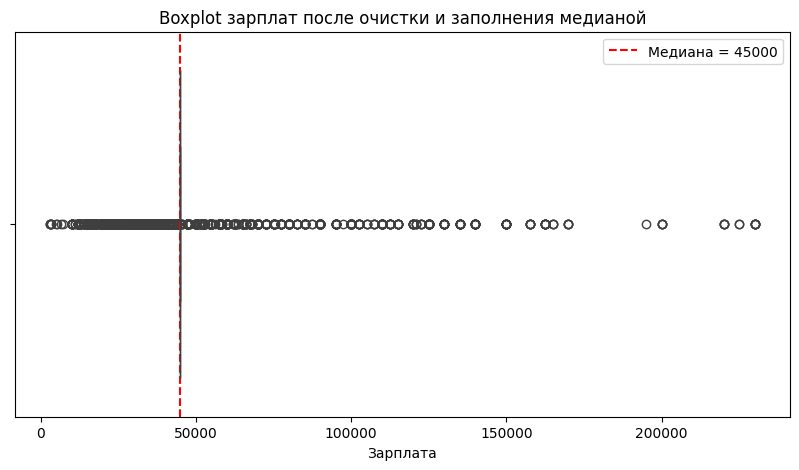

In [296]:
plt.figure(figsize=(10,5))

# Boxplot для salary_avg после очистки
sns.boxplot(x=df_processed["salary_avg"])
plt.title("Boxplot зарплат после очистки и заполнения медианой")
plt.xlabel("Зарплата")

# Добавим линию медианы для наглядности
median_value = df_processed["salary_avg"].median()
plt.axvline(median_value, color='red', linestyle='--', label=f'Медиана = {median_value:.0f}')
plt.legend()

plt.show()

In [297]:
# Удаляем оставшиеся нечисловые колонки
non_num_cols = df_processed.select_dtypes(exclude=[np.number]).columns
if len(non_num_cols) > 0:
    print(f"Удалены нечисловые колонки: {list(non_num_cols)}")
    df_processed = df_processed.drop(columns=non_num_cols, errors="ignore")
else:
    print("Все колонки успешно преобразованы в числовой формат")

print(f"\nИтоговый размер датасета: {df_processed.shape}")
print(f"Типы данных:\n{df_processed.dtypes.value_counts()}")

Все колонки успешно преобразованы в числовой формат

Итоговый размер датасета: (8269, 151)
Типы данных:
int64      142
float64      7
Int64        2
Name: count, dtype: int64


Сохранение и скачивание обработанного датасета

In [298]:
out_name = "processed_emed_careers_eu.csv"
df_processed.to_csv(out_name, index=False, encoding="utf-8")

print(f"Файл сохранен как: {out_name}")
print(f"Размер файла: {df_processed.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nПервые 5 строк обработанного датасета:")
print(df_processed.head())

df_processed.to_csv(out_name, index=False, encoding="utf-8")

Файл сохранен как: processed_emed_careers_eu.csv
Размер файла: 9.61 MB

Первые 5 строк обработанного датасета:
    post_year  post_month  post_day  post_dayofweek  desc_len  \
0      2018.0         4.0      14.0             5.0      2522   
8      2018.0         4.0      10.0             1.0      6314   
9      2018.0         4.0      10.0             1.0      2306   
18     2018.0         4.0      13.0             4.0      1820   
20     2018.0         4.0      16.0             0.0      1931   

    desc_word_count  kw_remote  kw_bonus  kw_senior  kw_junior  ...  \
0               359          0         0          1          0  ...   
8               849          0         1          1          1  ...   
9               327          0         0          1          1  ...   
18              285          0         0          0          0  ...   
20              264          0         0          0          0  ...   

    location_NORTH WEST  location_OXFORD  location_PARIS  location_PORT